**Asal Sekolah: SMKN 1 Surabaya**

**Nama Peserta: Davino Edric dan Muhammad Shofian Najib**

**No. Peserta: -**

# 1. Importing dan EDA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Statistical Smmary

In [2]:
df = pd.read_csv('coffee_shop_revenue.csv')
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


## Klasifikasi Daily Revenue menjadi Revenue Level

In [6]:
df['Revenue_Level'] = df['Daily_Revenue'].apply(lambda x: 'Low' if x < df['Daily_Revenue'].quantile(0.25) else ('High' if x > df['Daily_Revenue'].quantile(0.75) else 'Medium'))
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Level
0,152,6.74,14,4,106.62,97,1547.81,Medium
1,485,4.50,12,8,57.83,744,2084.68,Medium
2,398,9.09,6,6,91.76,636,3118.39,High
3,320,8.48,17,4,462.63,770,2912.20,High
4,156,7.44,17,2,412.52,232,1663.42,Medium


## 1.1 Distribusi tiap fitur menggunakan histogram dan boxplot

### Boxplot (Distribusi umum dengan whisker)
### Boxenplot (Distribusi lebih detail tanpa whisker)

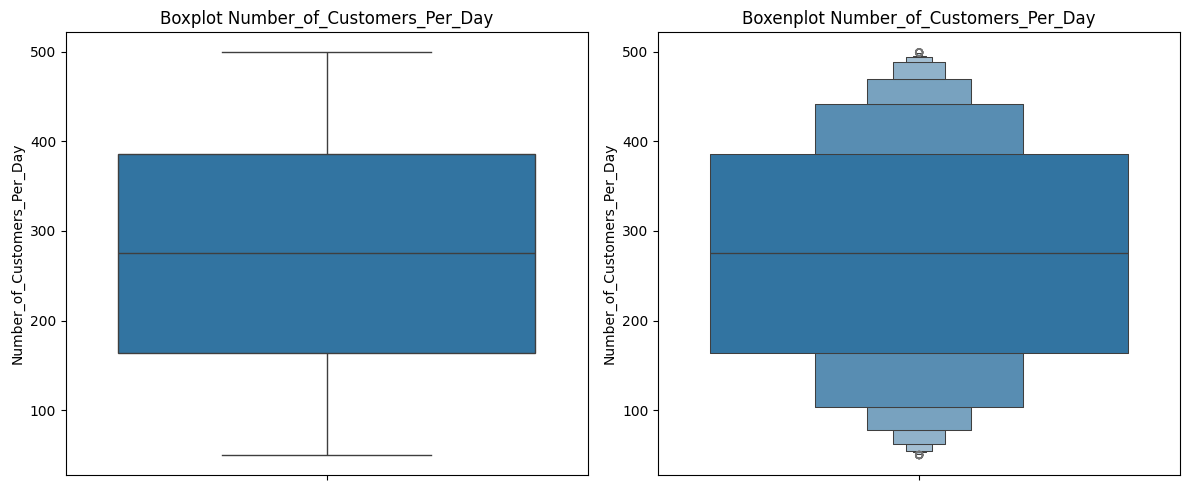

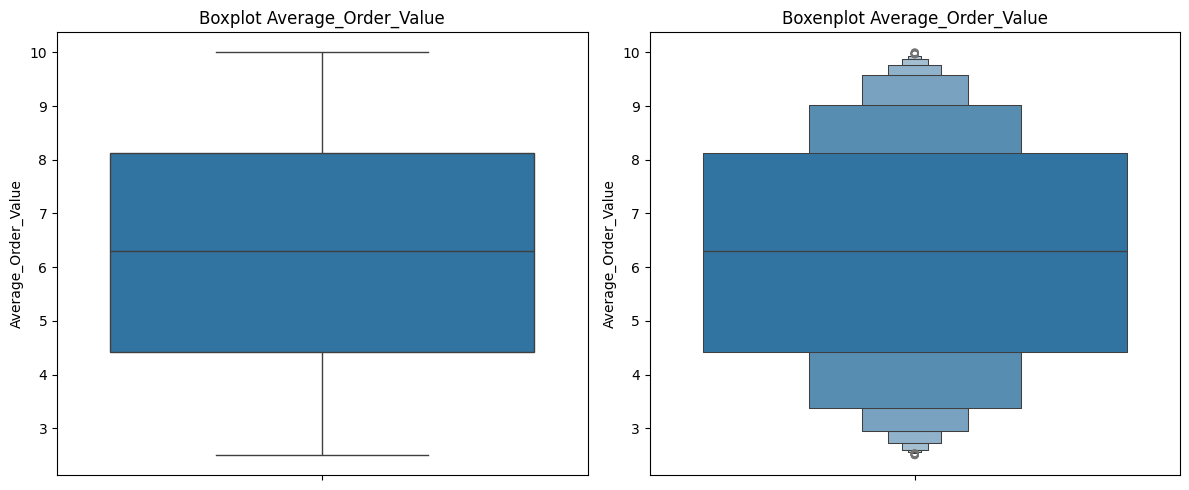

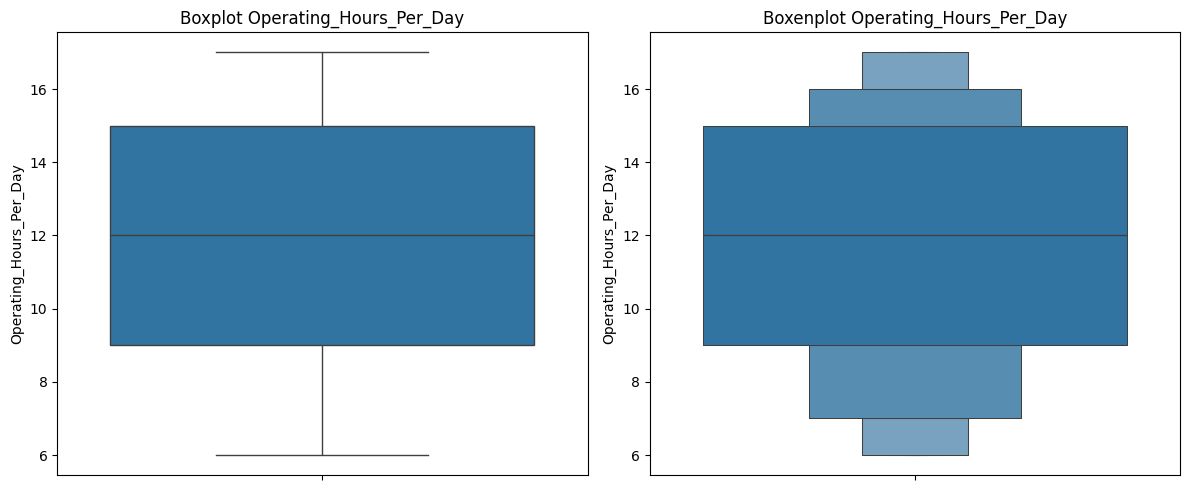

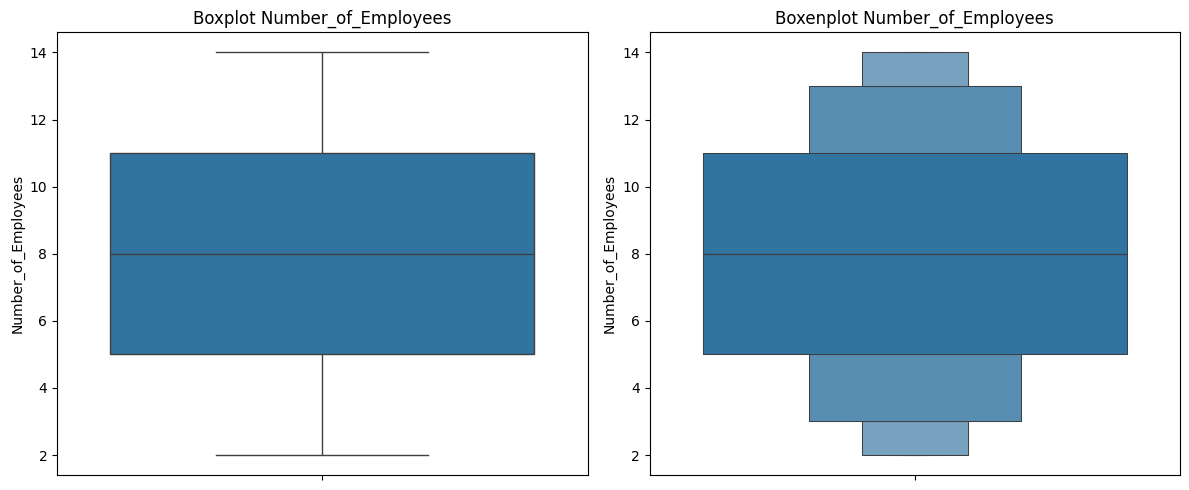

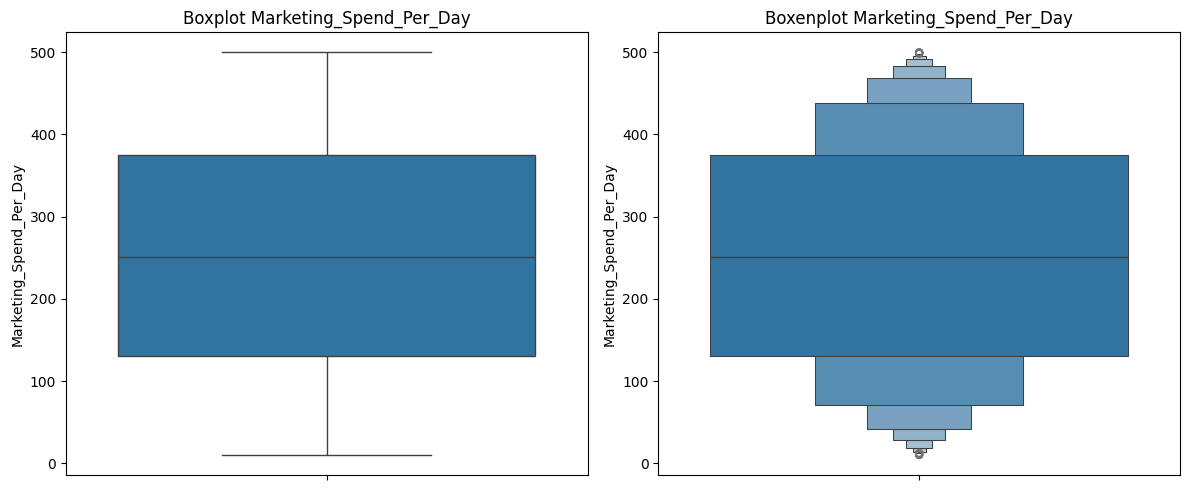

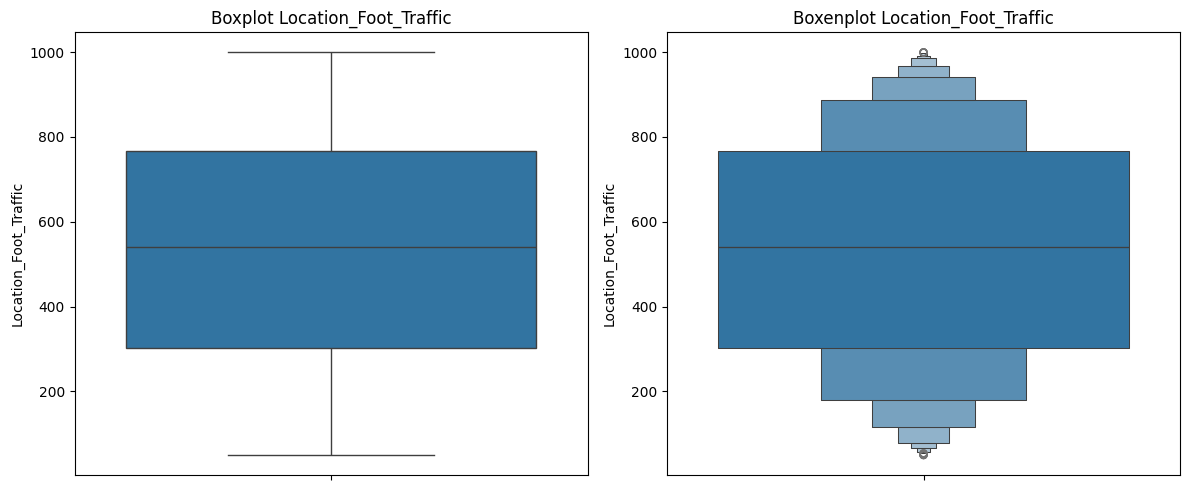

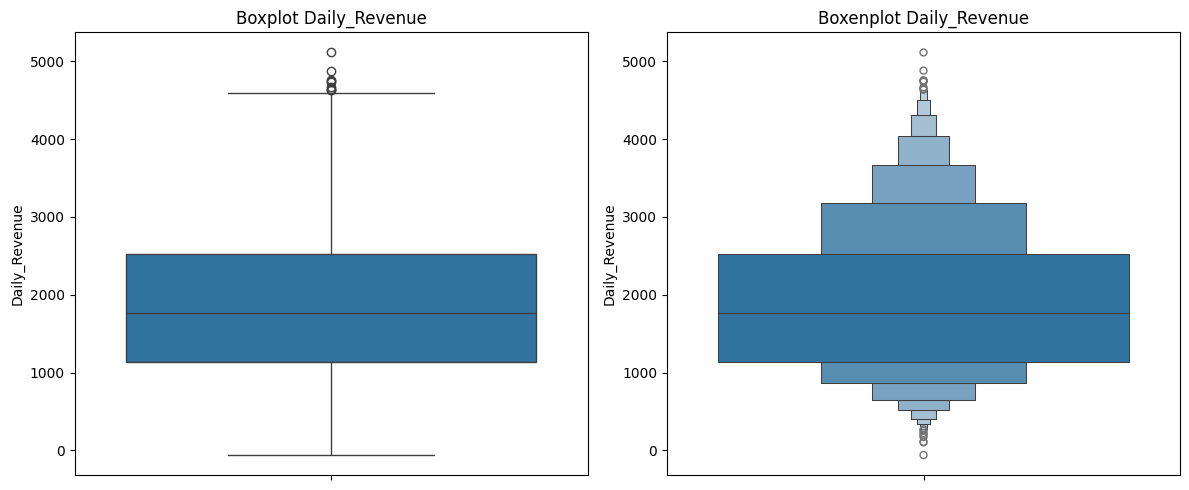

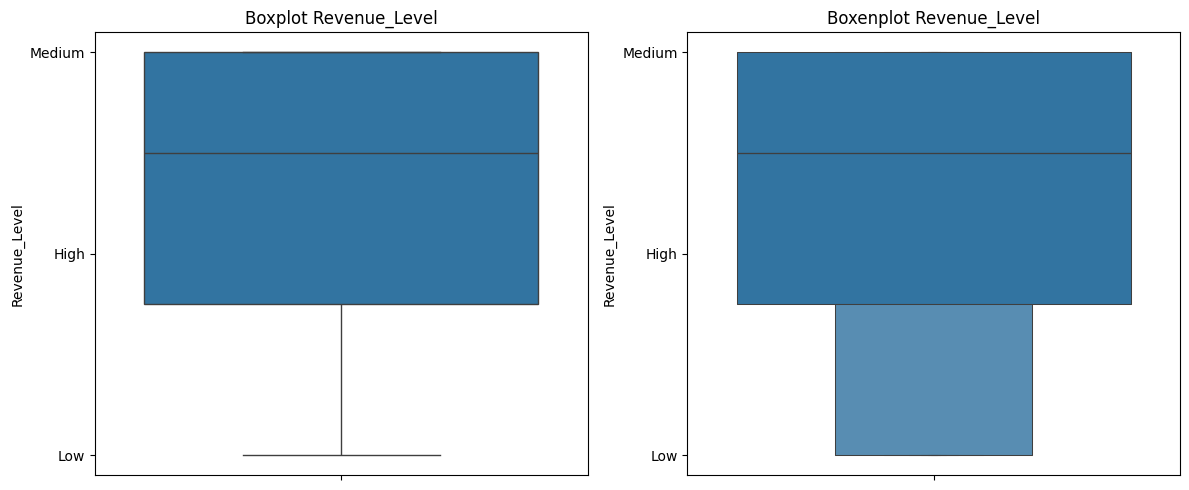

In [7]:
for i in df.columns:
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    sns.boxplot(df[i], ax=axes[0])
    axes[0].set_title(f'Boxplot {i}')
    
    sns.boxenplot(df[i],ax=axes[1])
    axes[1].set_title(f'Boxenplot {i}')
    plt.tight_layout()
    plt.show()

### Histogram Distribusi Tiap kolom
### Scatterplot hubungan antar kolom dengan Daily Revenue (Explore Korelasi)

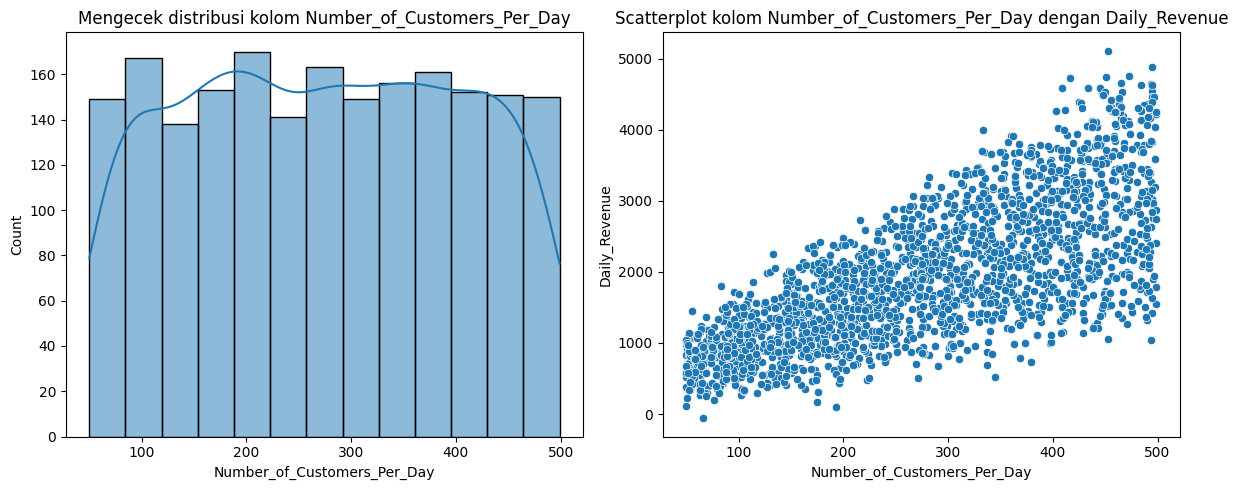

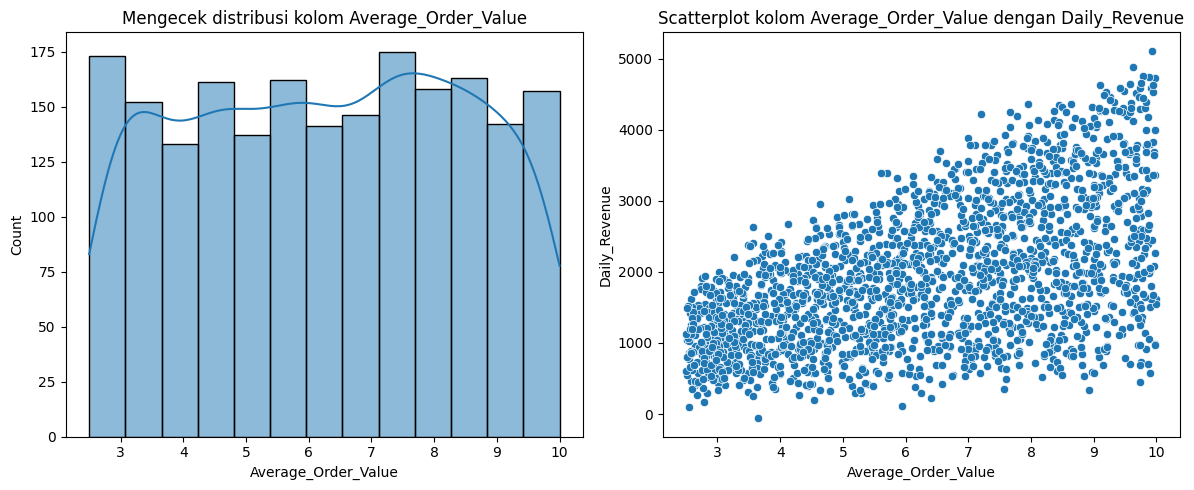

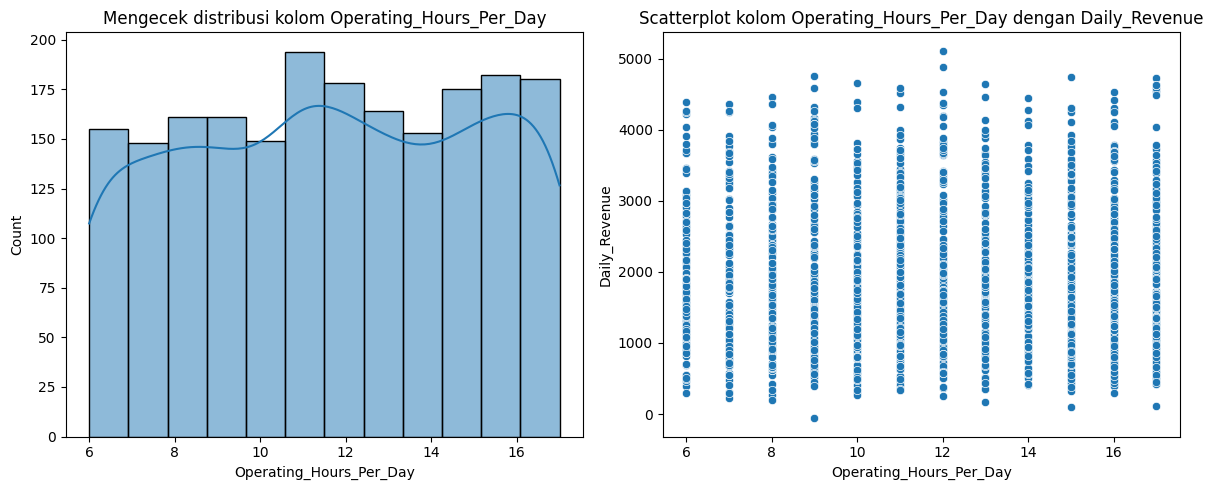

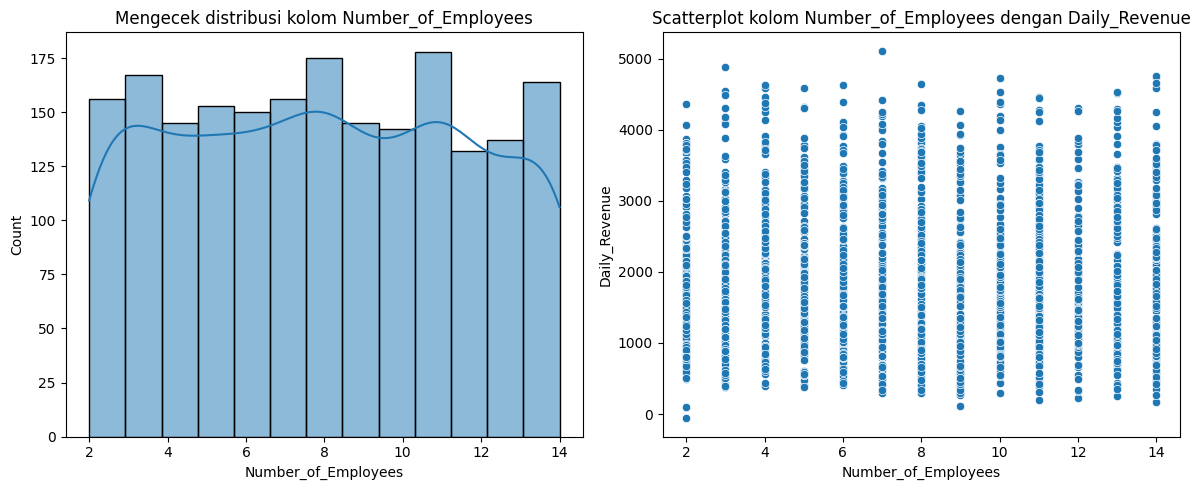

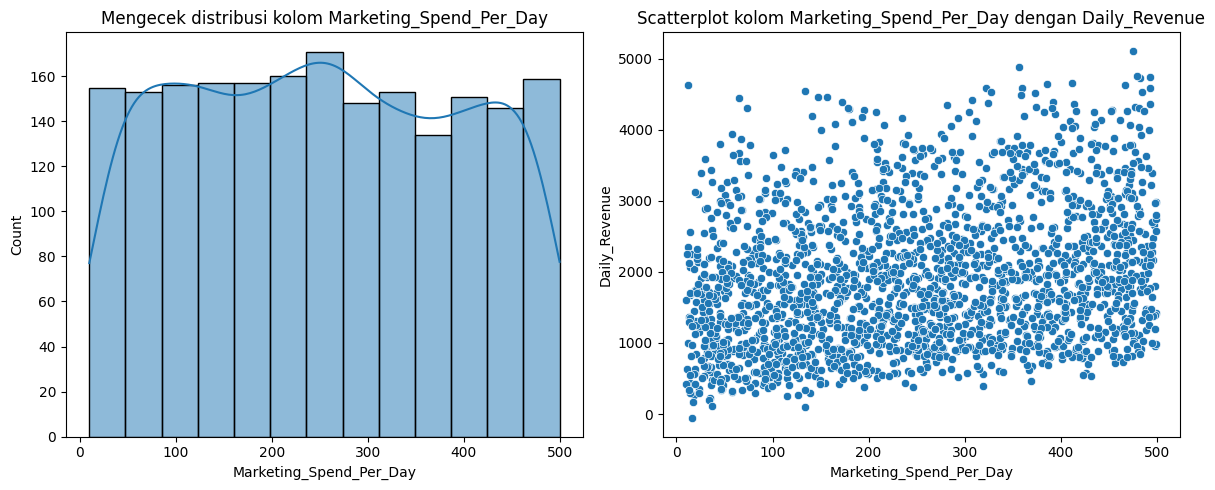

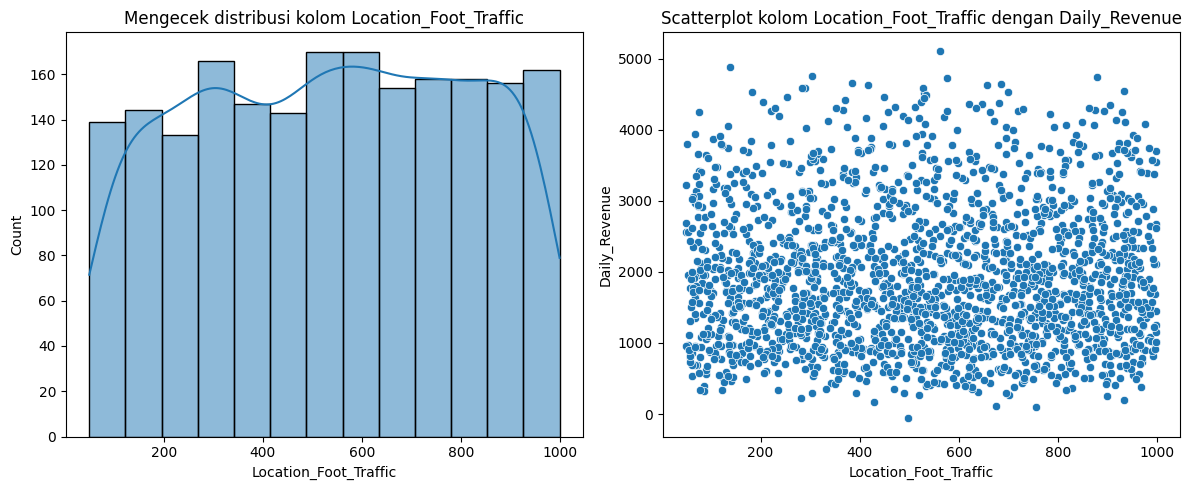

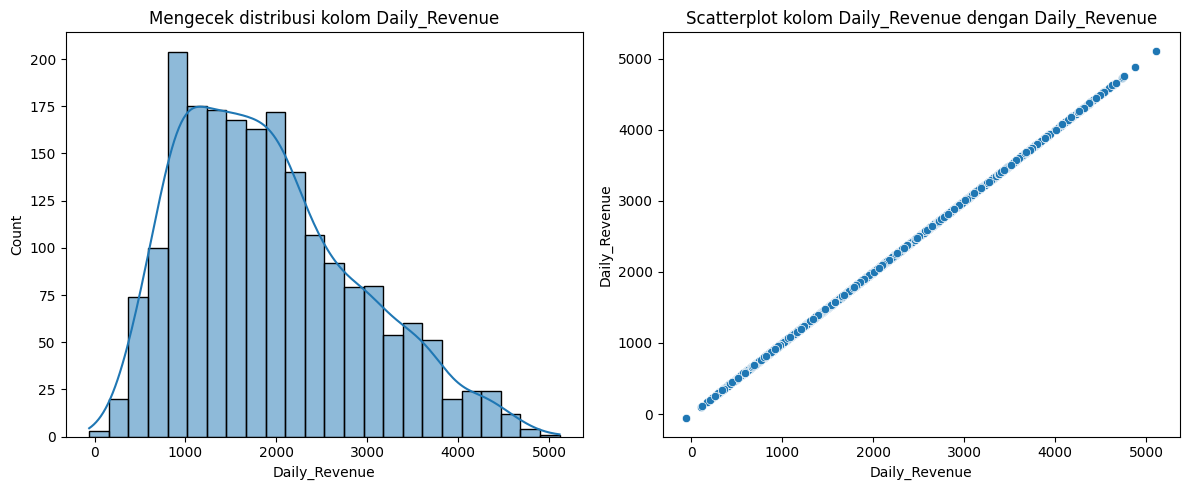

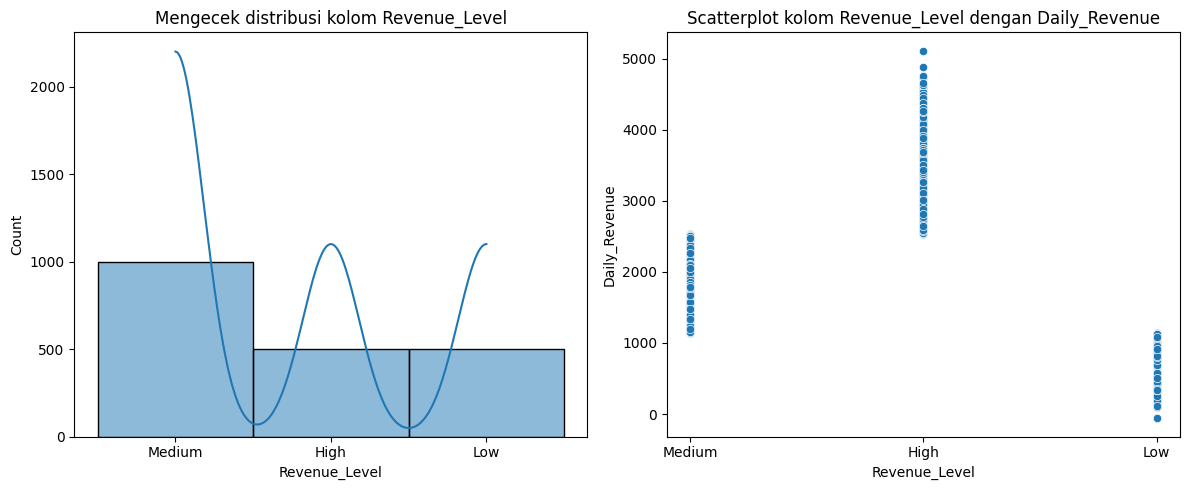

In [8]:
for i in df.columns:
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    sns.histplot(x=df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Mengecek distribusi kolom {i}')
    
    sns.scatterplot(x=df[i], y=df['Daily_Revenue'], ax=axes[1])
    axes[1].set_title(f'Scatterplot kolom {i} dengan Daily_Revenue')
    
    plt.tight_layout()
    plt.show()

## 1.4 Mengecek Outlier dengan IQR dan Z-Score

In [9]:
for c in df.select_dtypes('number'):
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3-q1
    lwr = q1 - iqr * 1.5
    upr = q3 + iqr *1.5
    
    zs = (df[c] - df[c].mean()) / df[c].std()
    
    outlier_zs = df[zs > 3]
    outlier_iqr = df[(df[c] < lwr) | (df[c] > upr)]

In [10]:
outlier_iqr

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Level
66,416,9.98,17,10,483.07,576,4737.16,High
85,451,9.88,15,14,493.23,879,4750.98,High
701,494,9.57,13,8,385.76,686,4646.33,High
1143,473,9.79,9,14,479.41,303,4756.55,High
1171,495,9.95,17,4,11.79,417,4634.73,High
1318,484,9.10,17,6,467.00,657,4626.59,High
1593,453,9.93,12,7,474.97,563,5114.60,High
1719,495,9.63,12,3,356.89,139,4881.00,High
1842,465,9.75,10,14,412.11,384,4667.03,High


In [11]:
outlier_zs

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Level
1593,453,9.93,12,7,474.97,563,5114.6,High
1719,495,9.63,12,3,356.89,139,4881.0,High


In [12]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


## Membuat Backup dataframe sebelum melakukan encoding kolom Revenue_Class untuk cek korelasi Heatmap

In [13]:
df_backup = df.copy(deep=True)
df['Revenue_Level'] = df['Revenue_Level'].map({
    'Low' :0,
    'Medium' :1,
    'High':2
})

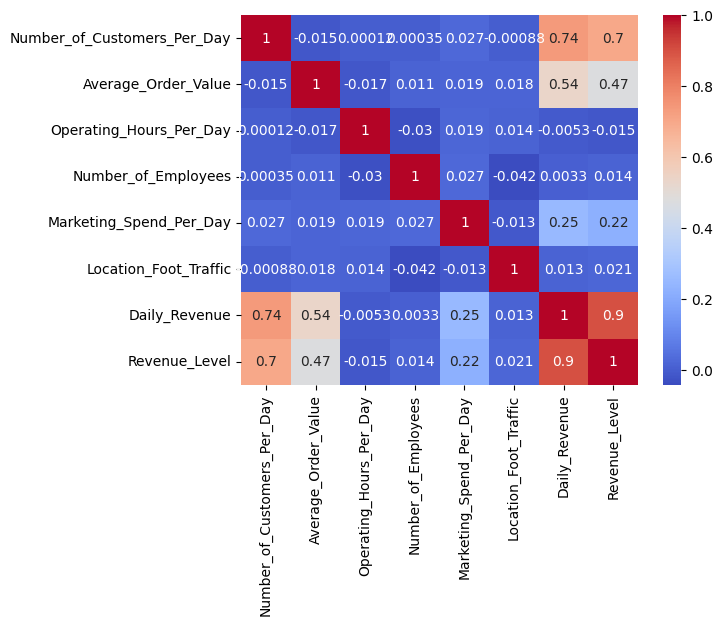

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Insight:

1. Kami Menemukan bahwa **jumlah orang yang menjadi customer** serta **rata-rata order value per customer** sangat berpengaruh ke **Revenue** (Explorasi lebih lanjut di tahap preprocessing)
2. **Daily_Revenue dan Revenue_Level sangat berkorelasi**, kolom **Daily_Revenue** mungkin akan **digunakan dalam bentuk lain untuk membantu prediksi model** (Log Transform atau digunakan di fitur lain)
3. **Tiga kolom terlihat tidak memiliki korelasi yang kuat dengan kedua kolom Revenue**, yakni kolom **Number of Employee**, **Marketing_Spend_Per_Day** dan **Operating Hours**. Meskipun, begitu, mereka dapat memberikan insight lebih terhadap performa cafe dan korelasinya terhadap pendapatan.
4. **Number of Employee** dapat digunakan untuk mengecek **rasio employee yang ada untuk tiap customer** (Customer to Employee Ratio), maupun mengecek **apakah lebih banyak employee dapat menarik lebih banyak customer dari orang yang melewati cafe dibanding jumlah employee yang lebih sedikit**.
5. **Operating Hours per Day** dapat digunakan untuk **menghitung fitur lain dalam hitungan per jam**, seperti Jumlah customer per jam dan jumlah revenue per jam.
6. **Marketing Spend dapat dibedah untuk mencari tahu apakah budget marketing lebih besar akan menghasilkan revenue yang lebih banyak**? Dapat diketahui melalui hubungan Customer dan Budget Marketing

# 2. Preprocessing

## 2.2 Membuat Kolom Log Transformasi Daily_Revenue

In [15]:
df['Log_Revenue'] = np.log1p(df['Daily_Revenue'])
df.head()

c:\Users\korez\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Level,Log_Revenue
0,152,6.74,14,4,106.62,97,1547.81,1,7.345242
1,485,4.50,12,8,57.83,744,2084.68,1,7.642850
2,398,9.09,6,6,91.76,636,3118.39,2,8.045393
3,320,8.48,17,4,462.63,770,2912.20,2,7.977007
4,156,7.44,17,2,412.52,232,1663.42,1,7.417232


In [16]:
df.dropna(subset='Log_Revenue', inplace=True)

In [17]:
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Level,Log_Revenue
0,152,6.74,14,4,106.62,97,1547.81,1,7.345242
1,485,4.50,12,8,57.83,744,2084.68,1,7.642850
2,398,9.09,6,6,91.76,636,3118.39,2,8.045393
3,320,8.48,17,4,462.63,770,2912.20,2,7.977007
4,156,7.44,17,2,412.52,232,1663.42,1,7.417232
...,...,...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85,2,7.943729
1996,105,3.01,11,7,12.62,235,337.97,0,5.825912
1997,89,5.28,16,9,376.64,310,951.34,0,6.858922
1998,403,9.41,7,12,452.49,577,4266.21,2,8.358715


Membuat Fitur dari fitur yang diberikan untuk eksplorasi data (Akan di drop jika ditentukan sebagai tidak terlalu berpengaruh ke model)

In [18]:
## Number of Customer >.< 
df['Real_Traffic'] = df['Location_Foot_Traffic'] - df['Number_of_Customers_Per_Day']
df['Value_Customer_Ratio'] = df['Number_of_Customers_Per_Day'] * df['Average_Order_Value']

## Fitur Berdasarkan Operating Hours
df['Order_Value_Per_Hour'] = df['Average_Order_Value'] / df['Operating_Hours_Per_Day']
df['Customer_Per_Hour'] = df['Number_of_Customers_Per_Day'] / df['Operating_Hours_Per_Day']
df['Customer_Value_Per_Hour'] = df['Customer_Per_Hour'] * df['Order_Value_Per_Hour']
df['Effective_Marketing_Per_Hour'] = df['Marketing_Spend_Per_Day'] / df['Operating_Hours_Per_Day']
df['Real_Traffic_Per_Hour'] = df['Real_Traffic'] / df['Operating_Hours_Per_Day']


##  Number of employee dalam membuat fitur baru
df['Revenue_Per_Employee'] = df['Daily_Revenue'] / df['Number_of_Employees']
df['Customer_Per_Employee'] = df['Customer_Per_Hour'] / df['Number_of_Employees']
df['Attraction_Power'] = (df['Number_of_Customers_Per_Day'] * df['Number_of_Employees'] * (df['Marketing_Spend_Per_Day'])) / 10000
df['Immunity_to_Attraction_People'] = (df['Real_Traffic'] / df['Attraction_Power'])
df['Immunity_to_Attraction_People'] = df['Immunity_to_Attraction_People'].apply(lambda x: 0 if x < 0.2 else 1)
df['IsBusy'] = df['Customer_Per_Hour'].apply(lambda x: 1 if x > df['Customer_Per_Hour'].median() else 0)
df['Busy_Factor'] = df['Real_Traffic_Per_Hour'] + df['Customer_Per_Hour'] / df['Number_of_Employees']
df['Busy_Marketing_Applied'] = df['Marketing_Spend_Per_Day'].apply(lambda x: 0 if x < df['Marketing_Spend_Per_Day'].median() else 1)
    
## Clean Revenue 
df['Clean_Revenue'] = df['Daily_Revenue'] - df['Marketing_Spend_Per_Day'] - df['Revenue_Per_Employee']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Number_of_Customers_Per_Day    1999 non-null   int64  
 1   Average_Order_Value            1999 non-null   float64
 2   Operating_Hours_Per_Day        1999 non-null   int64  
 3   Number_of_Employees            1999 non-null   int64  
 4   Marketing_Spend_Per_Day        1999 non-null   float64
 5   Location_Foot_Traffic          1999 non-null   int64  
 6   Daily_Revenue                  1999 non-null   float64
 7   Revenue_Level                  1999 non-null   int64  
 8   Log_Revenue                    1999 non-null   float64
 9   Real_Traffic                   1999 non-null   int64  
 10  Value_Customer_Ratio           1999 non-null   float64
 11  Order_Value_Per_Hour           1999 non-null   float64
 12  Customer_Per_Hour              1999 non-null   float6

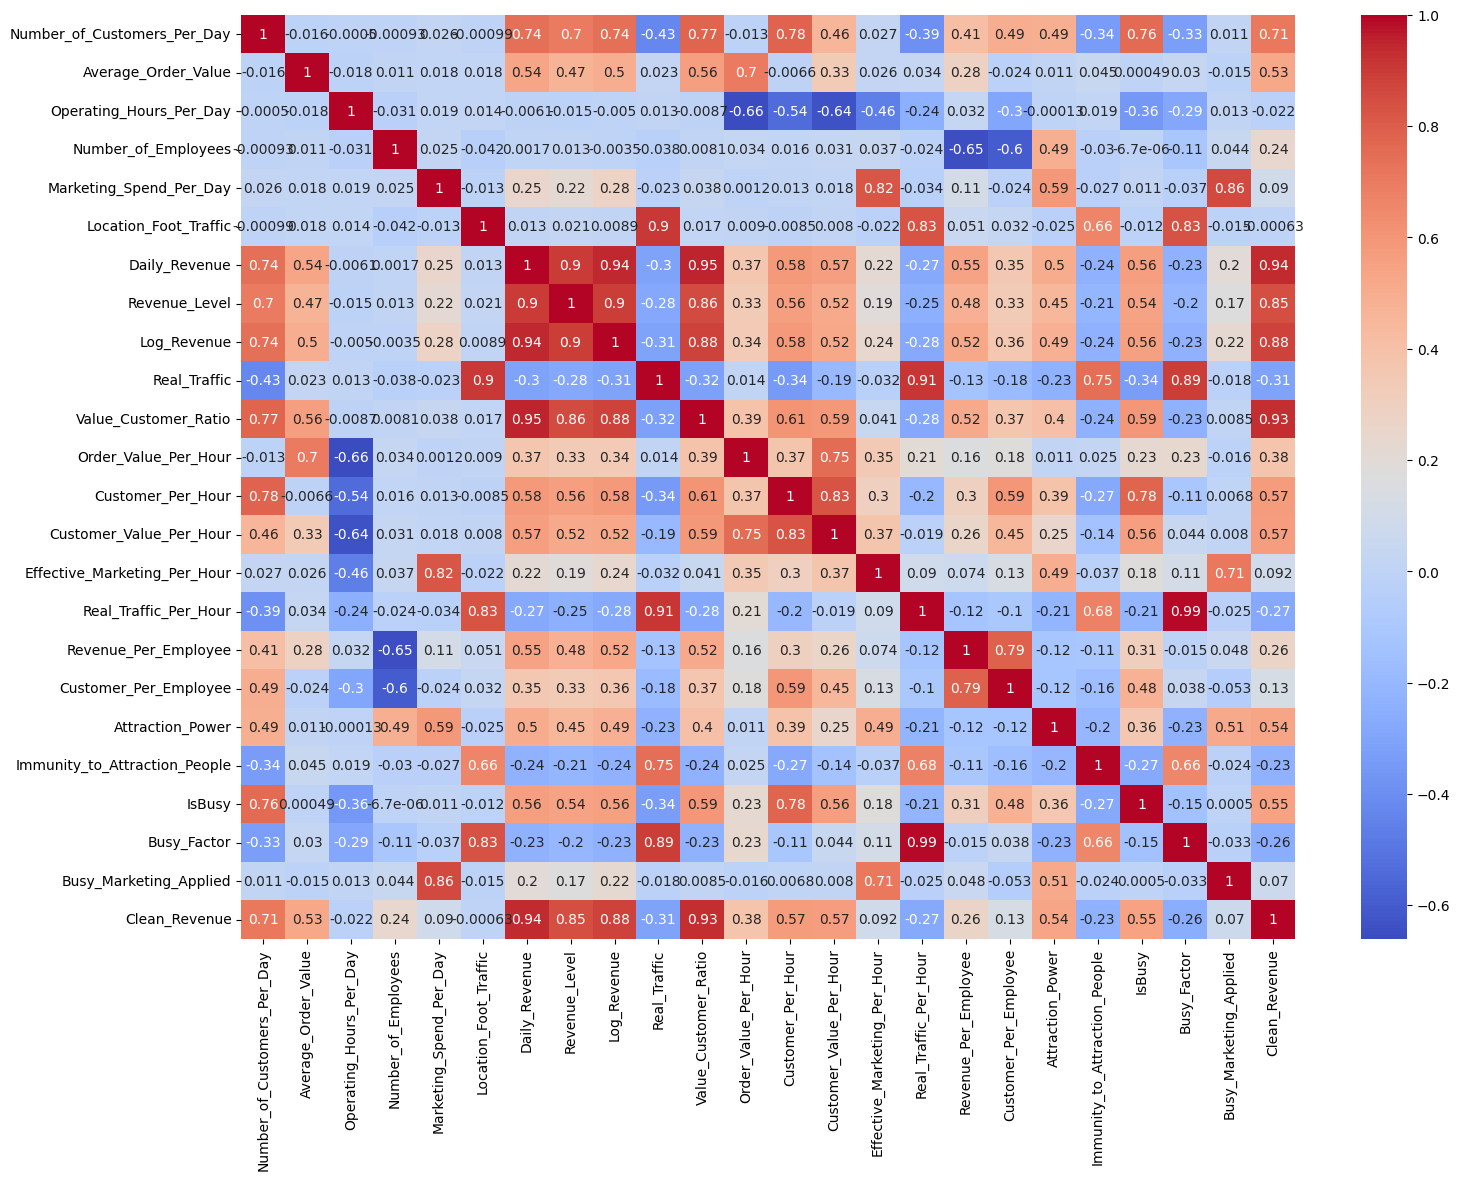

In [20]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [21]:
Employee_per_Busy = df.groupby('Number_of_Employees')[['Location_Foot_Traffic','Marketing_Spend_Per_Day','Customer_Per_Hour','IsBusy']].agg(['mean','median', 'max','sum','count']).sort_index()
Employee_per_Busy

Location_Foot_Traffic                           \
                                     mean median  max    sum count   
Number_of_Employees                                                  
2                              570.870968  587.0  981  88485   155   
3                              533.395210  511.0  998  89077   167   
4                              560.737931  566.0  999  81307   145   
5                              550.568627  521.0  997  84237   153   
6                              527.253333  539.5  999  79088   150   
7                              511.666667  504.5  999  79820   156   
8                              541.742857  576.0  999  94805   175   
9                              555.827586  604.0  999  80595   145   
10                             500.190141  497.5  999  71027   142   
11                             529.157303  569.5  986  94190   178   
12                             519.424242  504.0  995  68564   132   
13                             544.846715  541.0  991  74644   137   
14                             508.847561  523.5  998  83451   164   

                    Marketing_Spend_Per_Day                                   \
                                       mean   median     max       sum count   
Number_of_Employees                                                            
2                                241.792323  229.180  494.30  37477.81   155   
3                                239.406228  234.540  495.93  39980.84   167   
4                                264.708483  268.630  493.42  38382.73   145   
5                                266.294248  263.640  499.68  40743.02   153   
6                                248.842133  254.955  498.74  37326.32   150   
7                                248.874679  253.420  499.74  38824.45   156   
8                                238.046057  221.710  499.46  41658.06   175   
9                                249.396552  248.360  498.15  36162.50   145   
10                               261.500423  256.035  492.94  37133.06   142   
11                               248.871461  236.105  499.61  44299.12   178   
12                               271.583333  287.810  499.29  35849.00   132   
13                               260.060219  271.200  497.34  35628.25   137   
14                               254.554268  270.675  495.90  41746.90   164   

                    Customer_Per_Hour                                     \
                                 mean     median        max          sum   
Number_of_Employees                                                        
2                           23.821762  23.000000  69.000000  3692.373047   
3                           26.207227  22.125000  76.000000  4376.606932   
4                           27.065917  22.181818  82.666667  3924.557913   
5                           25.145559  25.428571  72.000000  3847.270515   
6                           27.389636  23.634921  82.666667  4108.445393   
7                           26.735250  23.455882  83.166667  4170.699039   
8                           24.242535  22.769231  70.714286  4242.443673   
9                           26.705370  23.750000  81.666667  3872.278701   
10                          26.502649  24.095455  71.500000  3763.376203   
11                          26.780038  24.481250  80.833333  4766.846837   
12                          24.954854  21.363095  76.666667  3294.040716   
13                          25.094223  21.866667  80.666667  3437.908578   
14                          27.346144  23.821429  76.666667  4484.767545   

                             IsBusy                       
                    count      mean median max sum count  
Number_of_Employees                                       
2                     155  0.490323    0.0   1  76   155  
3                     167  0.479042    0.0   1  80   167  
4                     145  0.482759    0.0   1  70   145  
5                     153  0.549020    1.0   1 

Note: Employee per Busy di sort berdasarkan jumlah pelanggan per jam yang paling stabil (std terendah sampai tertinggi), disini tidak terlihat pola dari jumlah pekerja yang sedang bekerja dengan pelanggan yang didapatkan per jam

In [22]:
rev_class_analysis = df.groupby('Revenue_Level')[['Location_Foot_Traffic','Real_Traffic','Customer_Per_Hour','Value_Customer_Ratio','IsBusy']].agg(['mean','median','sum','count']).sort_index()
rev_class_analysis

Location_Foot_Traffic                      Real_Traffic         \
                               mean median     sum count         mean median   
Revenue_Level                                                                  
0                        524.751503  540.0  261851   499   382.673347  398.0   
1                        537.087000  537.0  537087  1000   258.862000  273.5   
2                        540.704000  548.5  270352   500   141.896000  143.5   

                            Customer_Per_Hour                                 \
                  sum count              mean     median           sum count   
Revenue_Level                                                                  
0              190954   499         13.484632  11.066667   6728.831311   499   
1              258862  1000         26.124173  23.225000  26124.173326  1000   
2               70948   500         38.257221  34.535714  19128.610456   500   

              Value_Customer_Ratio                               IsBusy  \
                              mean    median         sum count     mean   
Revenue_Level                                                             
0                       636.233146   595.110   317480.34   499  0.12024   
1                      1538.269990  1520.575  1538269.99  1000  0.49500   
2                      3141.231500  3090.975  1570615.75   500  0.88800   

                                 
              median  sum count  
Revenue_Level                    
0                0.0   60   499  
1                0.0  495  1000  
2                1.0  444   500

Revenue level yang lebih tinggi terpengaruh cukup besar oleh vakue_custoomer_ratio serta jika toko pada hari itu sibuk atau tidak (IsBusy). Dan begitu juga halnya dengan Real_traffic, dia menurun karena semakin ramai toko kopi, maka orang yang berada di traffic pun berkurang

In [23]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Level,Log_Revenue,Real_Traffic,...,Effective_Marketing_Per_Hour,Real_Traffic_Per_Hour,Revenue_Per_Employee,Customer_Per_Employee,Attraction_Power,Immunity_to_Attraction_People,IsBusy,Busy_Factor,Busy_Marketing_Applied,Clean_Revenue
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,...,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,274.400200,6.262526,11.668334,7.949975,252.732396,534.912456,1918.314572,1.000500,7.415714,260.512256,...,23.852649,24.565745,334.106361,4.485117,56.137781,0.760380,0.499750,29.050862,0.500250,1331.475815
std,129.390393,2.175586,3.438950,3.740788,141.072208,271.728947,975.445026,0.707107,0.567595,301.078609,...,16.086769,31.193605,302.401592,4.323374,56.160105,0.426958,0.500125,31.056294,0.500125,824.689498
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,104.600000,0.000000,4.659658,-426.000000,...,0.629412,-67.333333,12.280000,0.235294,0.420864,0.000000,0.000000,-47.875000,0.000000,-81.770000
25%,164.000000,4.415000,9.000000,5.000000,130.230000,302.000000,1140.755000,1.000000,7.040322,20.000000,...,11.062500,1.869748,134.554167,1.711310,15.397596,1.000000,0.000000,5.736440,0.000000,679.122361
50%,275.000000,6.300000,12.000000,8.000000,251.040000,540.000000,1771.630000,1.000000,7.480220,273.000000,...,21.297333,23.100000,238.254286,3.054945,36.173046,1.000000,0.000000,27.012987,1.000000,1169.970000
75%,386.000000,8.120000,15.000000,11.000000,375.465000,767.000000,2531.350000,1.500000,7.836903,496.500000,...,32.672500,44.029412,417.790694,5.533712,79.459875,1.000000,1.000000,47.635302,1.000000,1814.220913
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000,2.000000,8.540050,945.000000,...,81.298333,145.666667,2185.505000,34.500000,319.806480,1.000000,1.000000,147.450000,1.000000,3975.394545


In [24]:
df['Marketing_spend_class'] = pd.cut(df['Marketing_Spend_Per_Day'], bins=[0,131,375,500],labels=[0,1,2])
Marketing_corr = df.groupby('Marketing_spend_class', observed=True)[['Number_of_Customers_Per_Day','Average_Order_Value','Clean_Revenue','Value_Customer_Ratio']].agg(['mean','median','sum','count']).sort_values(('Average_Order_Value','mean'),ascending=False)
Marketing_corr

Number_of_Customers_Per_Day                       \
                                             mean median     sum count   
Marketing_spend_class                                                    
1                                      275.041289  276.0  273116   993   
2                                      278.027944  278.0  139292   501   
0                                      269.540594  271.0  136118   505   

                      Average_Order_Value                       Clean_Revenue  \
                                     mean median      sum count          mean   
Marketing_spend_class                                                           
1                                6.342417   6.38  6298.02   993   1339.416136   
2                                6.244870   6.40  3128.68   501   1410.256753   
0                                6.122950   6.12  3092.09   505   1237.705543   

                                                       Value_Customer_Ratio  \
                            median           sum count                 mean   
Marketing_spend_class                                                         
1                      1173.540909  1.330040e+06   993          1738.199063   
2                      1281.423333  7.065386e+05   501          1744.664311   
0                      1100.105000  6.250413e+05   505          1636.153644   

                                                  
                        median         sum count  
Marketing_spend_class                             
1                      1547.22  1726031.67   993  
2                      1555.84   874076.82   501  
0                      1433.52   826257.59   505

Note: Marketing class dengan average order value tertinggi ada di kelas menengah, dengan jumlah rata-rata customer untuk budget menengah dan tinggi yang tidak terlalu jauh. Diminishing return, much?

In [25]:
df.drop(columns=['Location_Foot_Traffic','Operating_Hours_Per_Day','Number_of_Employees','Effective_Marketing_Per_Hour','Attraction_Power','Busy_Marketing_Applied'],inplace=True) # 'Order_Value_Per_Hour','Customer_To_Employee' 'Effective_Marketing_Per_Hour','Attraction_Power'

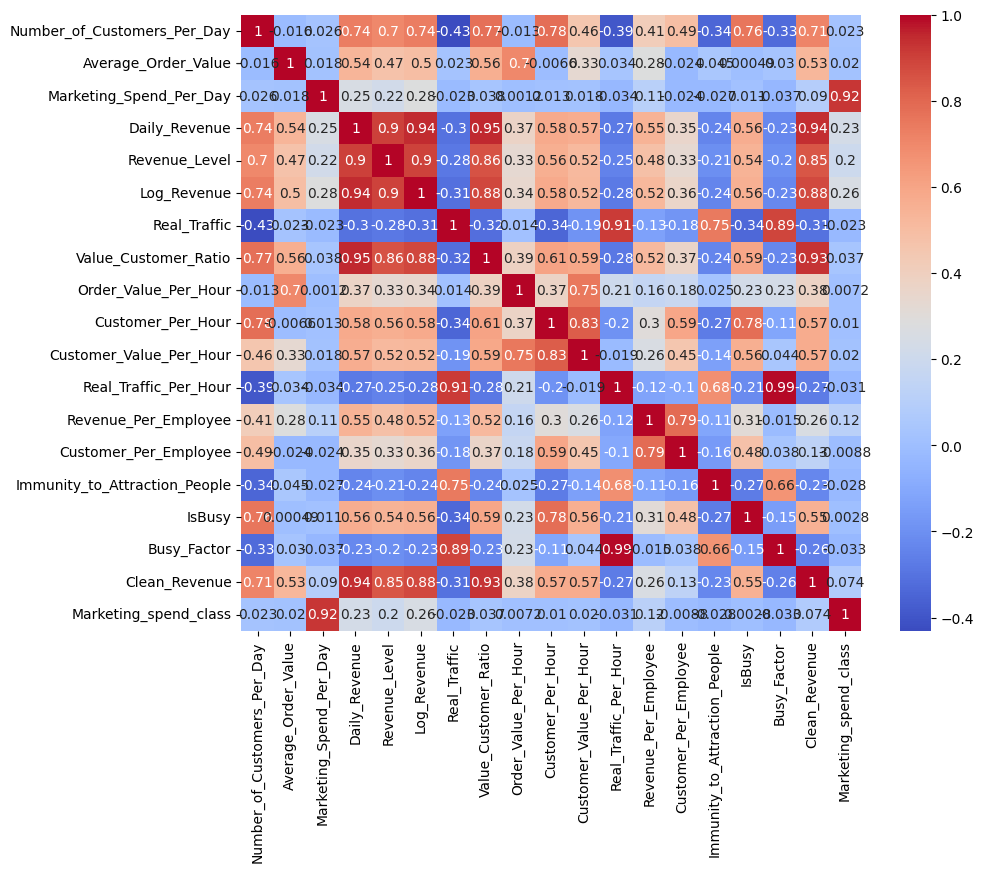

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Number_of_Customers_Per_Day    1999 non-null   int64   
 1   Average_Order_Value            1999 non-null   float64 
 2   Marketing_Spend_Per_Day        1999 non-null   float64 
 3   Daily_Revenue                  1999 non-null   float64 
 4   Revenue_Level                  1999 non-null   int64   
 5   Log_Revenue                    1999 non-null   float64 
 6   Real_Traffic                   1999 non-null   int64   
 7   Value_Customer_Ratio           1999 non-null   float64 
 8   Order_Value_Per_Hour           1999 non-null   float64 
 9   Customer_Per_Hour              1999 non-null   float64 
 10  Customer_Value_Per_Hour        1999 non-null   float64 
 11  Real_Traffic_Per_Hour          1999 non-null   float64 
 12  Revenue_Per_Employee           1999 non

In [28]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Daily_Revenue,Revenue_Level,Log_Revenue,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Revenue_Per_Employee,Customer_Per_Employee,Immunity_to_Attraction_People,IsBusy,Busy_Factor,Clean_Revenue,Marketing_spend_class
0,152,6.74,106.62,1547.81,1,7.345242,-55,1024.48,0.481429,10.857143,5.226939,-3.928571,386.952500,2.714286,0,0,-1.214286,1054.237500,0
1,485,4.50,57.83,2084.68,1,7.642850,259,2182.50,0.375000,40.416667,15.156250,21.583333,260.585000,5.052083,1,1,26.635417,1766.265000,0
2,398,9.09,91.76,3118.39,2,8.045393,238,3617.82,1.515000,66.333333,100.495000,39.666667,519.731667,11.055556,1,1,50.722222,2506.898333,0
3,320,8.48,462.63,2912.20,2,7.977007,450,2713.60,0.498824,18.823529,9.389619,26.470588,728.050000,4.705882,1,0,31.176471,1721.520000,2
4,156,7.44,412.52,1663.42,1,7.417232,76,1160.64,0.437647,9.176471,4.016055,4.470588,831.710000,4.588235,1,0,9.058824,419.190000,2


In [29]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Daily_Revenue,Revenue_Level,Log_Revenue,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Revenue_Per_Employee,Customer_Per_Employee,Immunity_to_Attraction_People,IsBusy,Busy_Factor,Clean_Revenue
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,274.400200,6.262526,252.732396,1918.314572,1.000500,7.415714,260.512256,1714.040060,0.594516,26.003809,17.193175,24.565745,334.106361,4.485117,0.760380,0.499750,29.050862,1331.475815
std,129.390393,2.175586,141.072208,975.445026,0.707107,0.567595,301.078609,1035.248111,0.297223,15.628140,17.381767,31.193605,302.401592,4.323374,0.426958,0.500125,31.056294,824.689498
min,50.000000,2.500000,10.120000,104.600000,0.000000,4.659658,-426.000000,149.060000,0.147647,2.941176,0.595640,-67.333333,12.280000,0.235294,0.000000,0.000000,-47.875000,-81.770000
25%,164.000000,4.415000,130.230000,1140.755000,1.000000,7.040322,20.000000,875.050000,0.371534,13.904545,5.954595,1.869748,134.554167,1.711310,1.000000,0.000000,5.736440,679.122361
50%,275.000000,6.300000,251.040000,1771.630000,1.000000,7.480220,273.000000,1522.350000,0.544000,23.400000,11.275000,23.100000,238.254286,3.054945,1.000000,0.000000,27.012987,1169.970000
75%,386.000000,8.120000,375.465000,2531.350000,1.500000,7.836903,496.500000,2347.150000,0.753375,34.500000,21.607160,44.029412,417.790694,5.533712,1.000000,1.000000,47.635302,1814.220913
max,499.000000,10.000000,499.740000,5114.600000,2.000000,8.540050,945.000000,4925.250000,1.665000,83.166667,122.411111,145.666667,2185.505000,34.500000,1.000000,1.000000,147.450000,3975.394545


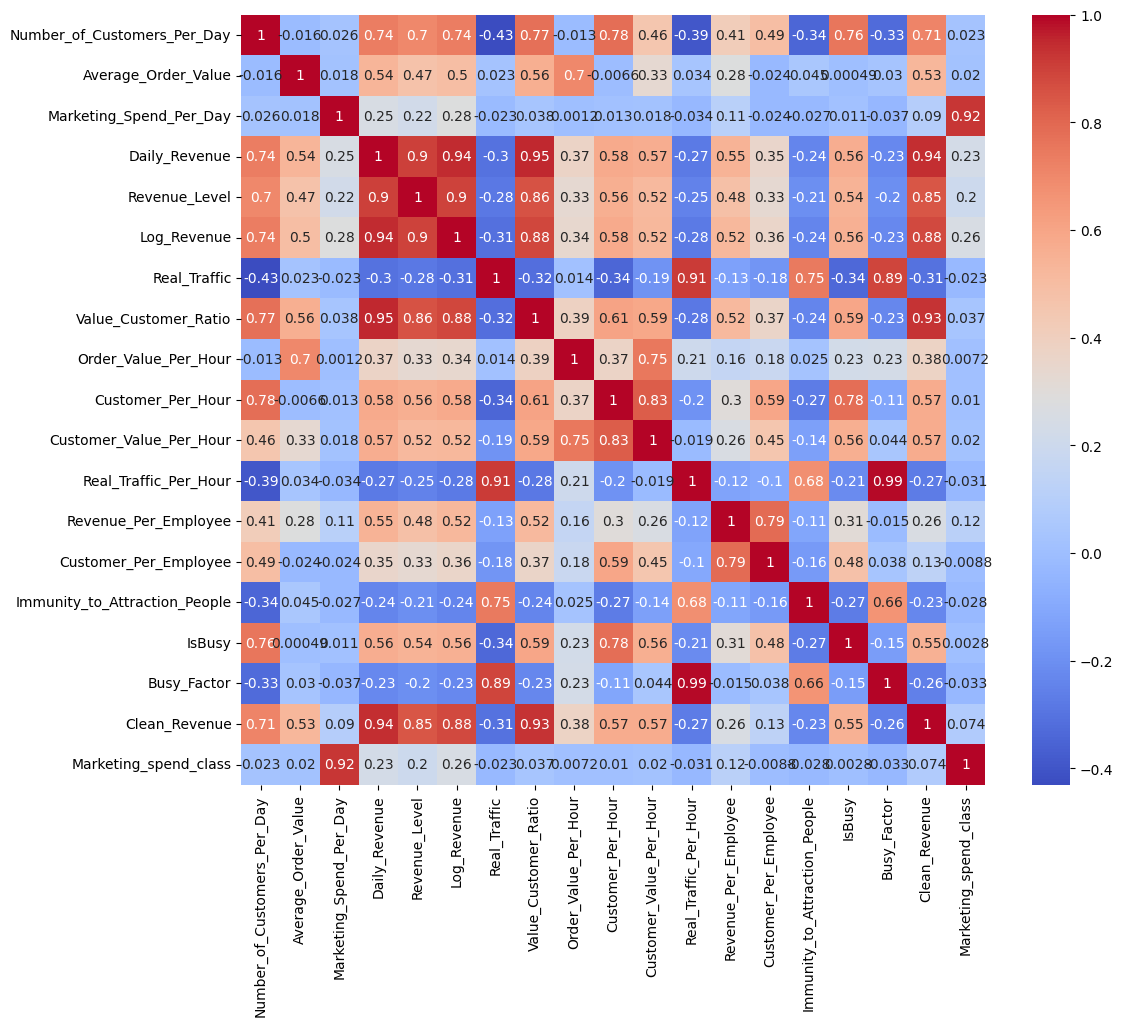

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('pearson'), annot=True, cmap='coolwarm')
plt.show()

In [31]:
df.shape

(1999, 19)

In [32]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Daily_Revenue,Revenue_Level,Log_Revenue,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Revenue_Per_Employee,Customer_Per_Employee,Immunity_to_Attraction_People,IsBusy,Busy_Factor,Clean_Revenue,Marketing_spend_class
0,152,6.74,106.62,1547.81,1,7.345242,-55,1024.48,0.481429,10.857143,5.226939,-3.928571,386.952500,2.714286,0,0,-1.214286,1054.237500,0
1,485,4.50,57.83,2084.68,1,7.642850,259,2182.50,0.375000,40.416667,15.156250,21.583333,260.585000,5.052083,1,1,26.635417,1766.265000,0
2,398,9.09,91.76,3118.39,2,8.045393,238,3617.82,1.515000,66.333333,100.495000,39.666667,519.731667,11.055556,1,1,50.722222,2506.898333,0
3,320,8.48,462.63,2912.20,2,7.977007,450,2713.60,0.498824,18.823529,9.389619,26.470588,728.050000,4.705882,1,0,31.176471,1721.520000,2
4,156,7.44,412.52,1663.42,1,7.417232,76,1160.64,0.437647,9.176471,4.016055,4.470588,831.710000,4.588235,1,0,9.058824,419.190000,2


## Insight:

1. **Jumlah pelayan dalam sehari tidak memiliki korelasi apapun pada kolom yang relevan kepada target class**, disini kami memutuskan untuk **tetap memasukkannya sebagai fitur** untuk model karena semakin **banyak employee akan mempengaruhi clean revenue, dan revenue_level sampai batas tertentu**.
2. Case insight pertama kembali terulang, tapi kali ini untuk **marketing spend per day**, dimana dia **memiliki korelasi yang cukup kuat dengan target class**, namun **tidak memiliki korelasi sama sekali dengan kolom lain**, **begitu halnya dengan kolom yang dibuat** menggunakan marketing spend, dimana mereka **tidak terlalu membantu dalam memprediksi target class**.
3. **Tiga kolom terlihat tidak memiliki korelasi yang kuat dengan kedua kolom Revenue**, yakni kolom **Number of Employee**, **Marketing_Spend_Per_Day** dan **Operating Hours**. Namun, ketiga **kolom tersebut telah kami gunakan untuk menghitung dan membuat fitur baru yang dapat membantu model**. Seperti **statistik per jam**, ataupun **hubungan antara jumlah pelayan dengan customer yang ada di dalam coffee shop**.
4. Untuk menjawab pertanyaan yang kami catat di bagian insight EDA, **mengenai apakah jika employee lebih banyak, maka customer yang didatangkan akan lebih banyak? Itu telah dibuktikan tidak benar**, bahkan, **jumlah employee sendiri tidak terlalu berpengaruh terhadap faktor apapun**, dan mungkin hanya berpengaruh ke pendapatan bersih yang didapatkan per hari
5. **Operating Hours telah digunakan untuk menghitung fitur dalam skala per jam**, dan ditemukan bahwa banyak kolom dengan skala per jam memiliki rasio korelasi yang lebih dikit dibanding dengan kolom originalnya ketika dicek korelasinya. Yang sangat disangka, karena **skala per jam ini digunakan untuk melihat detail terperinci dari data yang ada, lebih tepatnya untuk mencari pola yang tidak terlihat secara linear**.
6. Kolom **Marketing spend telah dilakukan experimen dengan beberapa kolom, dan tidak membuahkan hasil yang memuaskan dari semua bentuk eksperimen**, ini menunjukkan bahwa kolom marketing spend **tidak relevan dengan fitur lain selain pendapatan bersih**.

# 3. Modelling KNN 

## 3.1 Train Test Split Stratified

In [33]:
x = df.drop(columns=['Daily_Revenue','Revenue_Level','Log_Revenue','Revenue_Per_Employee','Immunity_to_Attraction_People','Busy_Factor','Clean_Revenue','Marketing_spend_class'])
xa = df.drop(columns=['Daily_Revenue','Revenue_Level','Log_Revenue','Immunity_to_Attraction_People','Busy_Factor',])
y = df['Revenue_Level']

In [34]:
xa['Revenue_Level'] = df['Revenue_Level']

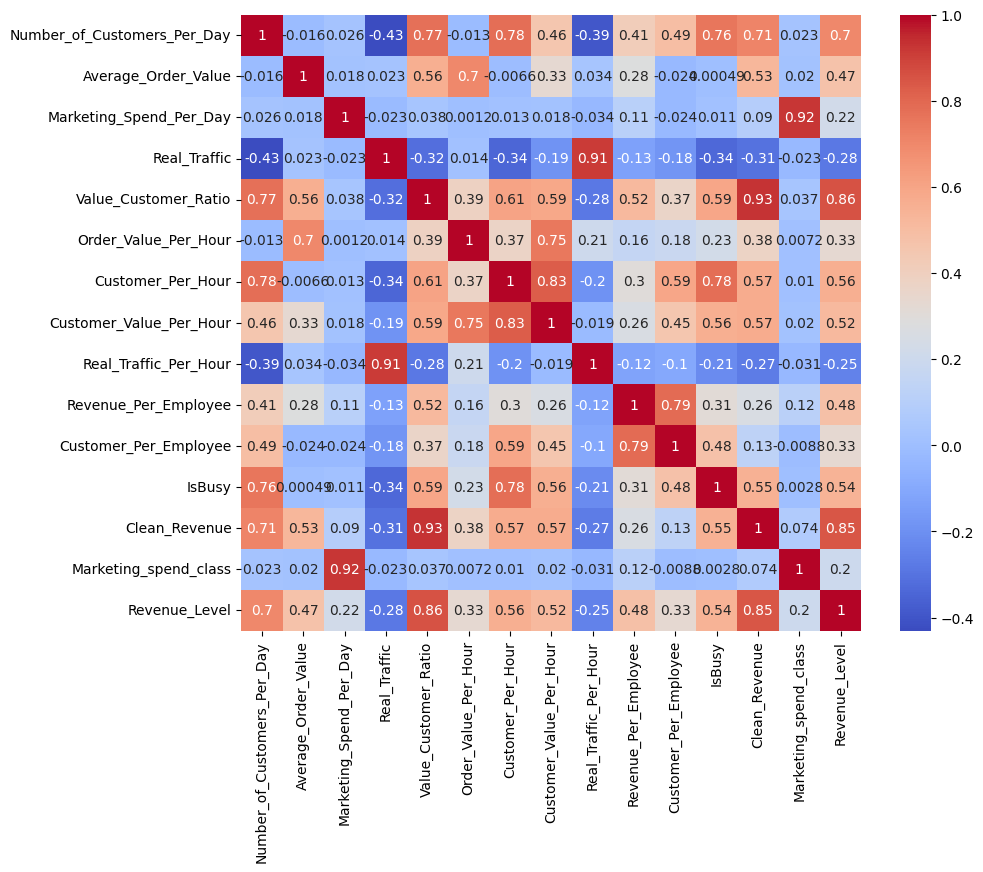

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(xa.corr(),annot=True,cmap='coolwarm')
plt.show()

In [36]:
xa.drop(columns='Revenue_Level',inplace=True)

In [37]:
x.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Customer_Per_Employee,IsBusy
0,152,6.74,106.62,-55,1024.48,0.481429,10.857143,5.226939,-3.928571,2.714286,0
1,485,4.50,57.83,259,2182.50,0.375000,40.416667,15.156250,21.583333,5.052083,1
2,398,9.09,91.76,238,3617.82,1.515000,66.333333,100.495000,39.666667,11.055556,1
3,320,8.48,462.63,450,2713.60,0.498824,18.823529,9.389619,26.470588,4.705882,0
4,156,7.44,412.52,76,1160.64,0.437647,9.176471,4.016055,4.470588,4.588235,0


In [38]:
x.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Customer_Per_Employee,IsBusy
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,274.400200,6.262526,252.732396,260.512256,1714.040060,0.594516,26.003809,17.193175,24.565745,4.485117,0.499750
std,129.390393,2.175586,141.072208,301.078609,1035.248111,0.297223,15.628140,17.381767,31.193605,4.323374,0.500125
min,50.000000,2.500000,10.120000,-426.000000,149.060000,0.147647,2.941176,0.595640,-67.333333,0.235294,0.000000
25%,164.000000,4.415000,130.230000,20.000000,875.050000,0.371534,13.904545,5.954595,1.869748,1.711310,0.000000
50%,275.000000,6.300000,251.040000,273.000000,1522.350000,0.544000,23.400000,11.275000,23.100000,3.054945,0.000000
75%,386.000000,8.120000,375.465000,496.500000,2347.150000,0.753375,34.500000,21.607160,44.029412,5.533712,1.000000
max,499.000000,10.000000,499.740000,945.000000,4925.250000,1.665000,83.166667,122.411111,145.666667,34.500000,1.000000


In [39]:
y.value_counts()

Revenue_Level
1    1000
2     500
0     499
Name: count, dtype: int64

In [40]:
def train_test_split(x, y, test_size=0.2, stratify=None, random_state=None):
    np.random.seed(random_state)
    
    x = np.array(x)
    y = np.array(y)
    
    if stratify is not None:
        unique_classes, y_indices = np.unique(stratify, return_inverse=True)
        test_indices = np.array([], dtype=int)
        train_indices = np.array([], dtype=int)
        
        for class_index in range(len(unique_classes)):
            class_indices = np.where(y_indices == class_index)[0]
            np.random.shuffle(class_indices)
            
            n_test = int(len(class_indices) * test_size)
            test_indices = np.concatenate((test_indices, class_indices[:n_test]))
            train_indices = np.concatenate((train_indices, class_indices[n_test:]))
    else:
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        
        n_test = int(len(y) * test_size)
        test_indices = indices[:n_test]
        train_indices = indices[n_test:]
    
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.201, stratify=y, random_state=42)
print(f'Jumlah x_train : {x_train.shape}')
print(f'Jumlah x_test : {x_test.shape}')
print(f'Jumlah y_train : {y_train.shape}')
print(f'Jumlah y_test : {y_test.shape}')

xa_train, xa_test, y_train, y_test = train_test_split(x, y, test_size=0.201, stratify=y, random_state=42)

Jumlah x_train : (1598, 11)
Jumlah x_test : (401, 11)
Jumlah y_train : (1598,)
Jumlah y_test : (401,)


## 3.2 Melakukan Normalisasi pada data yang diberikan

In [41]:
def min_max_scaler(train, test):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    epsilon = 1e-10
    train_scaled = (train - min_val) / (max_val - min_val + epsilon)
    test_scaled = (test - min_val) / (max_val - min_val + epsilon)
    
    return train_scaled, test_scaled, min_val, max_val

x_train_scaled, x_test_scaled, minim, maxim = min_max_scaler(x_train, x_test)
xa_train_scaled, xa_test_scaled, _, __ = min_max_scaler(xa_train, xa_test)

In [42]:
x_train[0]

array([2.01000000e+02, 3.86000000e+00, 3.19800000e+01, 1.55000000e+02,
       7.75860000e+02, 5.51428571e-01, 2.87142857e+01, 1.58338776e+01,
       2.21428571e+01, 7.17857143e+00, 1.00000000e+00])

In [43]:
x_train_scaled[0]

array([0.3363029 , 0.18133333, 0.04464687, 0.42377826, 0.13123431,
       0.26610916, 0.32125836, 0.12509279, 0.42007601, 0.20210959,
       1.        ])

## 3.3 Melakukan Oversampling sintetis (SMOTE)

In [44]:
def smote(x, y, random_state=42, k=5):
    np.random.seed(random_state)
    
    unique_classes = np.unique(y)
    class_counts = {class_label: np.sum(y == class_label) for class_label in unique_classes}
    max_class_count = max(class_counts.values())
    
    x_resampled = x.tolist()
    y_resampled = y.tolist()
    
    for class_label in unique_classes:
        if class_counts[class_label] < max_class_count:
            class_indices = np.where(y == class_label)[0]
            class_samples = x[class_indices]
            
            n_samples_to_generate = max_class_count - class_counts[class_label]
            
            for _ in range(n_samples_to_generate):
                sample_index = np.random.choice(class_indices)
                sample = x[sample_index]
                
                sample = np.array(sample).astype(float)
                class_samples = np.array(class_samples).astype(float)
                
                distances = np.linalg.norm(class_samples - sample, axis=1)
                nearest_neighbors = np.argsort(distances)[1:k+1]
                
                neighbor_index = np.random.choice(nearest_neighbors)
                neighbor = class_samples[neighbor_index]
                
                diff = neighbor - sample
                synthetic_sample = sample + np.random.rand() * diff
                
                x_resampled.append(synthetic_sample)
                y_resampled.append(class_label)
    
    return np.array(x_resampled), np.array(y_resampled)

x_train_resampled, y_train_resampled = smote(x_train_scaled, y_train)
xa_train_resampled, y_train_resampled = smote(xa_train_scaled, y_train)

## 3.4 Model KNN Manual

In [45]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def manhattan(a, b):
    return np.sum(np.abs(a - b))
def minkowski(a, b, p):
    return np.sum(np.abs( a - b) ** p) ** (1 / p)
class KNeighborsClassifierManual:
    def __init__(self, n_neighbours=5, metric='euclidean', p=3):
        self.n_neighbours = n_neighbours
        self.metric = metric.strip().lower()
        self.p = p
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        pred = [self._predict(x) for x in X]
        return np.array(pred)
    def _predict(self, x):
        distances = [self._distances(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbours]
        k_nearest = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest).argmax()
        return most_common
    def _distances(self, a, b):
        if self.metric == 'euclidean':
            return euclidean(a, b)
        elif self.metric == 'manhattan':
            return manhattan(a, b)
        elif self.metric == 'minkowski':
            return minkowski(a, b, self.p)
        else:
            raise ValueError(f'Metric tidak diketaui {self.metric}')

In [46]:
cols = x.columns.tolist()
knn = KNeighborsClassifierManual(n_neighbours=5, metric='Manhattan',p=3)
knn.fit(x_train_resampled,y_train_resampled)

## Function Evaluasi

### Cross Validation Score

In [47]:
def cross_val_score_knn(knn, X, y, cv=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(cv, X.shape[0] // cv, dtype=int)
    fold_sizes[:X.shape[0] % cv] += 1
    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        current = stop

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        scores.append(accuracy)

    return np.array(scores)

### Classification Report

In [48]:
def precision_recall_f1_support(y_true, y_pred, average=None):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    report = {}
    
    for label in labels:
        tp = sum((y_true[i] == label) and (y_pred[i] == label) for i in range(len(y_true)))
        fp = sum((y_true[i] != label) and (y_pred[i] == label) for i in range(len(y_true)))
        fn = sum((y_true[i] == label) and (y_pred[i] != label) for i in range(len(y_true)))
        tn = sum((y_true[i] != label) and (y_pred[i] != label) for i in range(len(y_true)))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(y == label for y in y_true)

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    if average == 'macro':
        avg_precision = sum(report[label]['precision'] for label in labels) / len(labels)
        avg_recall = sum(report[label]['recall'] for label in labels) / len(labels)
        avg_f1_score = sum(report[label]['f1-score'] for label in labels) / len(labels)
        avg_support = sum(report[label]['support'] for label in labels)
        
        report['macro avg'] = {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1-score': avg_f1_score,
            'support': avg_support
        }
    
    return report

def print_classification_report(report):
    print(f"{'Label':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("="*50)
    for label, metrics in report.items():
        print(f"{label:<10} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")

### Confusion Matrix

In [49]:
def confusion_matrix_manual(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    
    label_to_index = {label: index for index, label in enumerate(labels)}
    
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true], label_to_index[pred]] += 1
    
    return matrix, labels

def print_confusion_matrix(matrix, labels):
    print(f"{'':<10}", end="")
    for label in labels:
        print(f"{label:<10}", end="")
    print()
    
    for i, label in enumerate(labels):
        print(f"{label:<10}", end="")
        for j in range(len(labels)):
            print(f"{matrix[i, j]:<10}", end="")
        print()

### Grid Search 

In [50]:
def grid_search_knn(X_train, y_train, param_grid, cv=5):
    best_score = 0
    best_params = None
    for n_neighbours in param_grid['n_neighbours']:
        for metric in param_grid['metric']:
            for p in param_grid.get('p', [3]):
                knn = KNeighborsClassifierManual(n_neighbours=n_neighbours, metric=metric, p=p)
                scores = cross_val_score_knn(knn, X_train, y_train, cv=cv)
                mean_score = scores.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbours': n_neighbours, 'metric': metric, 'p': p}
    return best_params, best_score

param_grid = {
    'n_neighbours': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3, 4, 5] 
}

## Mencari Parameter Terbaik berdasarkan gridsearch dan melatih model KNN dengan parameter tersebut

In [ ]:
best_params, best_score = grid_search_knn(x_train_resampled, y_train_resampled, param_grid, cv=5)
print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

KeyboardInterrupt: 

In [61]:
knn = KNeighborsClassifierManual(n_neighbours= 5, metric= 'manhattan', p= 1) ## n_neighbors: 5, metric: 'manhattan', p: 1
knn.fit(x_train_resampled, y_train_resampled)
pred = knn.predict(x_test_scaled)

In [62]:
knna = KNeighborsClassifierManual(n_neighbours= 5, metric= 'manhattan', p= 1)
knna.fit(xa_train_resampled, y_train_resampled)
preda = knna.predict(xa_test_scaled)

# 4. Evaluasi Model KNN

## Evaluasi model utama

In [63]:
accuracy = np.mean(pred == y_test)
print(f'Akurasi Model KNN {accuracy}')

Akurasi Model KNN 0.8428927680798005


In [64]:
report_knn = precision_recall_f1_support(y_test, pred, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
0          0.76       0.88       0.81       100       
1          0.90       0.78       0.83       201       
2          0.85       0.94       0.89       100       
macro avg  0.83       0.87       0.85       401       


In [65]:
matrix, labels = confusion_matrix_manual(y_test, pred)
print_confusion_matrix(matrix, labels)

          0         1         2         
0         88        12        0         
1         28        156       17        
2         0         6         94        


In [66]:
cv_scores = cross_val_score_knn(knn=knn,X=x_train_resampled,y=y_train_resampled,cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')

Cross-validation scores: [0.88541667 0.90625    0.8914405  0.8914405  0.86430063]
Mean accuracy: 0.8877696590118301


## Evaluasi Model Alternatif

In [67]:
accuracy = np.mean(preda == y_test)
print(f'Akurasi Model KNN {accuracy}')

Akurasi Model KNN 0.8428927680798005


In [68]:
report_knn = precision_recall_f1_support(y_test, preda, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
0          0.76       0.88       0.81       100       
1          0.90       0.78       0.83       201       
2          0.85       0.94       0.89       100       
macro avg  0.83       0.87       0.85       401       


In [69]:
matrix, labels = confusion_matrix_manual(y_test, preda)
print_confusion_matrix(matrix, labels)

          0         1         2         
0         88        12        0         
1         28        156       17        
2         0         6         94        


In [70]:
cv_scores = cross_val_score_knn(knn=knn,X=xa_train_resampled,y=y_train_resampled,cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')

Cross-validation scores: [0.88541667 0.90625    0.8914405  0.8914405  0.86430063]
Mean accuracy: 0.8877696590118301


## Melakukan testing pada data baru dan membandingkan seberapa dekat data baru dengan kelas yang telah diprediksi

In [71]:
x.head(1)

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Customer_Per_Employee,IsBusy
0,152,6.74,106.62,-55,1024.48,0.481429,10.857143,5.226939,-3.928571,2.714286,0


In [72]:
new_data = {
    'Number_of_Customers_Per_Day':[160],
    'Average_Order_Value':[8.2],
    'Marketing_Spend_Per_Day':[130],
    'Real_Traffic':[(840-160)],
    'Value_Customer_Ratio':[(8.2 * 160)],
    'Order_Value_Per_Hour':[(8/2 / 10)],
    'Customer_Per_Hour':[(160 / 10)],
    'Customer_Value_Per_Hour':[(0.82 * 16)],
    'Real_Traffic_Per_Hour':[((840-160) / 10)],
    'Customer_Per_Employee':[(16 / 3)],
    'IsBusy':[(0)],
}

new_data = pd.DataFrame(new_data)
new_data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Real_Traffic,Value_Customer_Ratio,Order_Value_Per_Hour,Customer_Per_Hour,Customer_Value_Per_Hour,Real_Traffic_Per_Hour,Customer_Per_Employee,IsBusy
0,160,8.2,130,680,1312.0,0.4,16.0,13.12,68.0,5.333333,0


In [73]:
nd_scaled = np.array(((new_data - minim) / (maxim - minim + 1e-10)))

In [74]:
nd_scaled

array([[0.24498886, 0.76      , 0.24484294, 0.80671043, 0.24348696,
        0.1663113 , 0.16277649, 0.1028142 , 0.63536776, 0.14822156,
        0.        ]])

In [75]:
x_train_scaled[0]

array([0.3363029 , 0.18133333, 0.04464687, 0.42377826, 0.13123431,
       0.26610916, 0.32125836, 0.12509279, 0.42007601, 0.20210959,
       1.        ])

In [76]:
new_pred = knn.predict(nd_scaled)
if new_pred[0] == 0:
    print("Kafe tersebut memiliki revenue level Low")
elif new_pred[0] == 1:
    print('Kafe tersebut memiliki revenue level Medium')
else:
    print('Kafe tersebut memiliki revenue level High')

Kafe tersebut memiliki revenue level Medium


In [77]:
ft = new_data.columns
reference_row = new_data.iloc[0][ft].values
target_class = df[df['Revenue_Level'] == new_pred[0]]
result = []
result_to_all = []

for idx, row in target_class.iterrows():
    if idx:
        sample_row = row[ft].values
        dist = np.sqrt(np.sum((sample_row - reference_row) ** 2))
        result.append({'index':idx,'distance':dist})
        
for idx, row in df.iterrows():
    if idx:
        sample_row = row[ft].values
        dist = np.sqrt(np.sum((sample_row - reference_row) ** 2))
        result_to_all.append({'index':idx,'distance':dist})

In [78]:
closest_df_target = pd.DataFrame(result).sort_values(by='distance')
print(closest_df_target.head())

     index    distance
684   1372   83.093279
834   1660  108.541901
503   1014  111.496131
906   1812  113.230819
157    327  125.737139


In [79]:
closest_df_All = pd.DataFrame(result_to_all).sort_values(by='distance')
print(closest_df_All.head())

      index    distance
433     434   80.190693
1371   1372   83.093279
1659   1660  108.541901
1013   1014  111.496131
1810   1812  113.230819


In [80]:
df.iloc[434,4]

np.int64(0)

In [ ]:
import customtkinter as ctk
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the appearance mode and color theme for the GUI
ctk.set_appearance_mode("System")  # Modes: "System" (default), "Dark", "Light"
ctk.set_default_color_theme("blue")  # Themes: "blue" (default), "green", "dark-blue"

class App(ctk.CTk):
    def __init__(self, model, label_encoder):
        super().__init__()

        self.model = model
        self.label_encoder = label_encoder

        # Configure window
        self.title("Coffee Shop Revenue Predictor")
        self.geometry("400x450")

        # Create a frame for the input fields
        self.input_frame = ctk.CTkFrame(self)
        self.input_frame.pack(pady=20, padx=20, fill="both", expand=True)

        # Create and place the input fields and labels
        self.create_entry("Number of Customers Per Day:", "customers_entry")
        self.create_entry("Average Order Value:", "order_value_entry")
        self.create_entry("Operating Hours Per Day:", "hours_entry")
        self.create_entry("Number of Employees:", "employees_entry")
        self.create_entry("Marketing Spend Per Day:", "marketing_spend_entry")
        self.create_entry("Location Foot Traffic:", "foot_traffic_entry")

        # Create and place the predict button
        self.predict_button = ctk.CTkButton(self, text="Predict Revenue Level", command=self.predict_revenue)
        self.predict_button.pack(pady=10)

        # Create a label to display the result
        self.result_label = ctk.CTkLabel(self, text="", font=("Arial", 16))
        self.result_label.pack(pady=10)

    def create_entry(self, text, entry_name):
        """Helper function to create a label and an entry widget."""
        frame = ctk.CTkFrame(self.input_frame)
        frame.pack(pady=5, padx=10, fill="x")
        label = ctk.CTkLabel(frame, text=text, width=25)
        label.pack(side="left", padx=(0, 10))
        entry = ctk.CTkEntry(frame)
        entry.pack(side="left", fill="x", expand=True)
        setattr(self, entry_name, entry)

    def predict_revenue(self):
        """
        Predicts the revenue level based on the input values.
        """
        try:
            # Get values from the entry fields
            customers = float(self.customers_entry.get())
            order_value = float(self.order_value_entry.get())
            hours = float(self.hours_entry.get())
            employees = float(self.employees_entry.get())
            marketing_spend = float(self.marketing_spend_entry.get())
            foot_traffic = float(self.foot_traffic_entry.get())

            # Create a numpy array for the new data
            new_data = np.array([[customers, order_value, hours, employees, marketing_spend, foot_traffic]])

            # Predict the revenue level
            prediction_encoded = self.model.predict(new_data)
            prediction = self.label_encoder.inverse_transform(prediction_encoded)


            # Display the prediction
            self.result_label.configure(text=f"Predicted Revenue Level: {prediction[0]}")

        except ValueError:
            self.result_label.configure(text="Please enter valid numbers in all fields.")
        except Exception as e:
            self.result_label.configure(text=f"An error occurred: {e}")


if __name__ == "__main__":
    try:
        # Create and run the application
        app = App(model=knn, label_encoder=label_encoder)
        app.mainloop()

    except FileNotFoundError:
        print("Error: 'coffee_shop_revenue.csv' not found. Make sure the file is in the same directory as the script.")
    except Exception as e:
        print(f"An error occurred: {e}")

## Insight:

1. **Model pertama sudah cukup baik untuk digunakan dalam praktek lapangan untuk memprediksi tingkat revenue yang didapatkan oleh toko coffee shop.** Namun, **model alternatif dengan data mengenai pendapatan bersih yang didapatkan, dapat memprediksi dengan lebih baik**, ini dikarenakan beberapa fitur yang berpengaruh kepada target class menggunakan kolom lain serta pendapatan bersih untuk dapat dibuat.
2. **Kami menemukan bahwa kolom Location_foot_traffic sedikit misleading**, dengan mengurangi foot traffic dengan jumlah pelanggan yang didapat oleh sebuah coffee shop, kita **mendapatkan traffic asli dari daerah situ. Yang telah membantu dengan analisis data serta modelling kami.**
3. **Customer yang sering mengunjungi coffee shop ini adalah pelanggan yang memang sudah kenal dan nyaman dengan coffee shop** ini, hal ini kita ketahui setelah **cross check korelasi antar marketing spend** dengan **real traffic** dan juga **customers per day**, dimana **tidak memiliki korelasi** sama sekali. 
4. **Kami tidak menemukan korelasi diantara jumlah pelayan yang bekerja pada hari itu dengan kolom lain**, untuk lebih detail, kami tidak menemukan korelasi kolom tersebut dengan kolom number of customers per day. Maka, **jumlah pelayan yang banyak tidak memastikan bahwa akan lebih banyak customer yang datang ke toko. **
5. **Kami berhasil membuat kolom yang tidak memiliki korelasi di awal** (Operating hours per day, number of employees, dan Location Foot Traffic) **menjadi kolom yang dapat lebih membantu model dalam memprediksi tingkat pendapatan yang dimiliki oleh coffee shop tersebut**.
6. **Kami menemukan bahwa model akan memiliki rata-rata akurasi yang sama, mau kami membuat atau tidak membuat kolom baru**. Namun, **kami memutuskan untuk menambahkan kolom baru**. Karena, meskipun akan membutuhkan waktu lebih lama untuk melatih model, kami menemukan bahwa **model dengan fitur yang lebih banyak memiliki kecenderungan untuk tidak overfitting** (Di cek melalui cross validation iteration)

## Pesan untuk Perusahaan:
1. Dari hasil analisis kami, **coffee shop memiliki pelanggan yang jumlahnya konsisten**, namun, **jumlah pelanggan tidak memiliki hubungan dengan jumlah marketing yang dilakukan per hari**, serta **tidak berpengaruh terhadap jumlah karyawan yang ada**. Kami menyarankan untuk perusahaan agar **menetapkan jumlah pelayan yang tetap dan konsisten, serta memikirkan ulang strategi marketing yang dilakukan**.
2. **Kami menemukan bahwa Value_Customer_Ratio** (Benchmark untuk banyak customer yang membeli order yang valuable) **sering terpantau tinggi**, ini **menunjukkan kinerja bagus perusahaan dalam memuaskan pelanggan yang sudah ada.**
3. **Demi memantau pelanggan yang baru datang**, kami sarankan untuk **perusahaan agar mencatat status pelanggan tersebut**, bisa dalam **bentuk CustomerID maupun ditanyakan langsung ketika pelanggan ingin beli**. Setelah itu, bisa **dirangkum jumlah pelanggan yang memiliki CustomerID (Membership_Customer)**, karena ini dapat **memberikan statistik jika marketing baru yang dilakukan telah berhasil menarik lebih banyak orang yang belum pernah berlangganan sebelumnya.**
4. **Kegunaan CustomerID** akan **memberikan info** yang sangat berharga, seperti **umur pelanggan** tersebut (Bisa melakukan **analisis demografi**), dapat mengetahui **berapa kali pelanggan datang sebelumnya**, **riwayat pembelian**, serta **kapan terakhir pelanggan datang** ke kafe (**Churn analysis**)